> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.


# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The blow study is to investigate a Movie database and try to obtain insights about the data  

In [36]:
import pandas as pd # calling 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

<a id='wrangling'></a>
## Data Wrangling

> I start bay looking at sample of the data  in order to under stand how the data is arraigned  

> 
 I’m trying to answer the following question
>1.	Is there relation between the budget the movie and profit 
>2.	In which rating category do most movies fall 


### Loading and Displaying Data

In [37]:
df = pd.read_csv('tmdb-movies.csv') #Checking
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [38]:
df.shape #Checking shape

(10866, 21)

In [39]:
df.describe()#Checking DataSet summry

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

> In this step I am trying to reduce the amount of data in the data set in order to be able to use only the required data. Multiple columns are dropped as below.

In [40]:
df = df.drop("homepage", axis=1) # Droping Column we do not need
df = df.drop("tagline", axis=1) 
df = df.drop("keywords", axis=1) 
df = df.drop("imdb_id", axis=1) 
df = df.drop("original_title", axis=1)
df = df.drop("genres", axis=1)
df = df.drop("overview", axis=1) 
df = df.drop("director", axis=1) 
df = df.drop("runtime", axis=1) 
df = df.drop("cast", axis=1)
df = df.drop("release_date", axis=1)
df = df.drop("release_year", axis=1)
df = df.drop("vote_count", axis=1)
df.head(1000)

,id,popularity,budget,revenue,production_companies,vote_average,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Universal Studios|Amblin Entertainment|Legenda...,6.5,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Summit Entertainment|Mandeville Films|Red Wago...,6.3,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Lucasfilm|Truenorth Productions|Bad Robot,7.5,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Universal Pictures|Original Film|Media Rights ...,7.3,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,Regency Enterprises|Appian Way|CatchPlay|Anony...,7.2,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Paramount Pictures|Skydance Productions,5.8,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,Twentieth Century Fox Film Corporation|Scott F...,7.6,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Universal Pictures|Illumination Entertainment,6.5,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Walt Disney Pictures|Pixar Animation Studios|W...,8.0,1.609999e+08,7.854116e+08


In [41]:
df['budget']=df['budget'].replace(0,df['budget'].mean()) # replace 0 values with mean

df['revenue']=df['revenue'].replace(0,df['revenue'].mean())

df['budget_adj']=df['budget_adj'].replace(0,df['budget_adj'].mean())

df['revenue_adj']=df['revenue_adj'].replace(0,df['revenue_adj'].mean())

In [42]:
df['production_companies'] = df['production_companies'].fillna('NaN') # Replace the null values

In [43]:
df.head()

,id,popularity,budget,revenue,production_companies,vote_average,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Universal Studios|Amblin Entertainment|Legenda...,6.5,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Summit Entertainment|Mandeville Films|Red Wago...,6.3,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Lucasfilm|Truenorth Productions|Bad Robot,7.5,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Universal Pictures|Original Film|Media Rights ...,7.3,1.747999e+08,1.385749e+09


In [44]:
df['production_companies'] = df['production_companies'].apply(lambda x: x.split('|')[0]) #split

In [45]:
df['production_companies'].head() # Check 

0            Universal Studios
1    Village Roadshow Pictures
2         Summit Entertainment
3                    Lucasfilm
4           Universal Pictures
Name: production_companies, dtype: object

In [46]:
df.info() # Check 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null float64
revenue                 10866 non-null float64
production_companies    10866 non-null object
vote_average            10866 non-null float64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 679.2+ KB


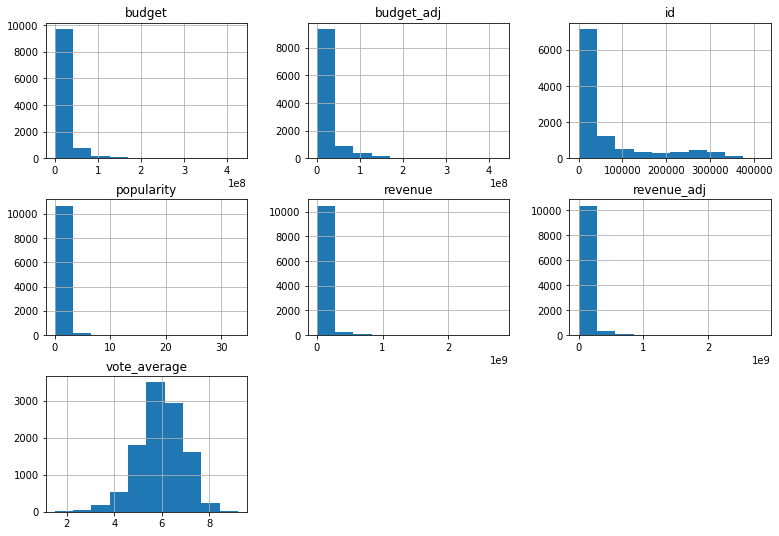

In [47]:
df.hist(figsize=(13,9)); # We try to visualize our data in order to try and create meaningful relations 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Is there relation between the budget the movie and profit)

In [48]:
df ['profit']=df['revenue_adj']-df['budget'] 
#Here I am creating a new column that is called profit.
#This represents the total revenue – the total budget in order to see the relation between the budget and profit.

In [49]:
df.head()

,id,popularity,budget,revenue,production_companies,vote_average,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Universal Studios,6.5,1.379999e+08,1.392446e+09,1.242446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Village Roadshow Pictures,7.1,1.379999e+08,3.481613e+08,1.981613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Summit Entertainment,6.3,1.012000e+08,2.716190e+08,1.616190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Lucasfilm,7.5,1.839999e+08,1.902723e+09,1.702723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Universal Pictures,7.3,1.747999e+08,1.385749e+09,1.195749e+09


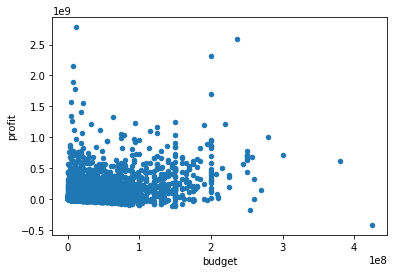

In [50]:
df.plot('budget', 'profit' , kind = 'scatter');

In [51]:
#I use a scatter plot in order to identify if there is a relation between profit and budget.
#After looking at the results, it can be clearly seen that there is a very minor relation between profit and the movie budget.
#The relation is not too strong meaning that other factors are affecting the profit of a movie.

### In which rating category do most movies fall 

In [52]:
def Rating_group (vote_average):
    if vote_average >=8:
        return 'High'
    elif vote_average >=5:
        return 'Medium'
    elif vote_average >=3:
        return 'Low'
    else:
        return 'Bad'

df['Rating_group'] = df['vote_average'].apply(Rating_group)
df.head(30)

#in order to understand how the movies rating are distributed,
#we group the movies based on their rating into 4 groups. High >8, medium >5, low > 3, and bad >0.
#We also generate a count in order to quantify how the movies are distributed.


,id,popularity,budget,revenue,production_companies,vote_average,budget_adj,revenue_adj,profit,Rating_group
0,135397,32.985763,150000000.0,1.513529e+09,Universal Studios,6.5,1.379999e+08,1.392446e+09,1.242446e+09,Medium
1,76341,28.419936,150000000.0,3.784364e+08,Village Roadshow Pictures,7.1,1.379999e+08,3.481613e+08,1.981613e+08,Medium
2,262500,13.112507,110000000.0,2.952382e+08,Summit Entertainment,6.3,1.012000e+08,2.716190e+08,1.616190e+08,Medium
3,140607,11.173104,200000000.0,2.068178e+09,Lucasfilm,7.5,1.839999e+08,1.902723e+09,1.702723e+09,Medium
4,168259,9.335014,190000000.0,1.506249e+09,Universal Pictures,7.3,1.747999e+08,1.385749e+09,1.195749e+09,Medium
5,281957,9.110700,135000000.0,5.329505e+08,Regency Enterprises,7.2,1.241999e+08,4.903142e+08,3.553142e+08,Medium
6,87101,8.654359,155000000.0,4.406035e+08,Paramount Pictures,5.8,1.425999e+08,4.053551e+08,2.503551e+08,Medium
7,286217,7.667400,108000000.0,5.953803e+08,Twentieth Century Fox Film Corporation,7.6,9.935996e+07,5.477497e+08,4.397497e+08,Medium
8,211672,7.404165,74000000.0,1.156731e+09,Universal Pictures,6.5,6.807997e+07,1.064192e+09,9.901920e+08,Medium
9,150540,6.326804,175000000.0,8.537086e+08,Walt Disney Pictures,8.0,1.609999e+08,7.854116e+08,6.104116e+08,High


In [53]:
company_rating = df.groupby('Rating_group')['production_companies'].count()
company_rating 

Rating_group
Bad         42
High        91
Low       1379
Medium    9354
Name: production_companies, dtype: int64

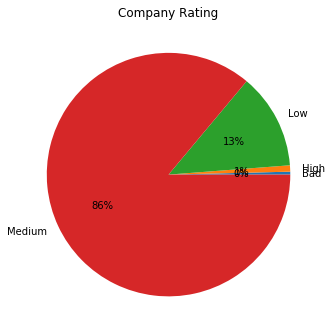

In [54]:
plt.subplot(1,2,2)
df.groupby('Rating_group')['vote_average'].count().plot(kind='pie',autopct='%1.0f%%',figsize=(12,6))
plt.title('Company Rating')
plt.ylabel("")
plt.show()
#we generate a pie-chart in order to visualize the results and it is very clear that 86% of this data base is made up of medium rating movies. 
#This result indicates two things:
#Most movie reviewers give medium rating to movies
#This result might be negatively affect profitability since people might see the rating before deciding weather to see the movie or not. 


<a id='conclusions'></a>
## Conclusions

> I was able to go through the data, clean it, create equations, and create two relations in order to answer the questions that I set out to answer. I can conclude that the profitability of the movie is slightly affected by the size of the budget. I could also find that most people when rating a movie categorize it as medium class and their review is not generous nor harsh.

> It seems that the data is limited by the variation of data when it comes to rating. From the analysis 86% of the data falls in the medium rating zone and causing bias to the data when used. This is a major limitation when trying to build a model for all ranges of rating.

> Another limitaiton that was face is the lack of strong relation in the used features. This limitaion could hender the efforts to be able to create good predictions on this data set.


